# Molecular Dynamics

!["Cu atoms"](https://upload.wikimedia.org/wikipedia/commons/4/42/Cudeposition.gif)

!["Water molecules"](https://upload.wikimedia.org/wikipedia/commons/f/f4/MD_water.gif)

:::{figure-md} markdown-fig  

<img src="./figs/mcmd.png" alt="dp" style="width:15%">

MD vs MC: Both sample microstates. The former follows the natural motion (dynamics) the later samples from Botlzman distribution following rules designed to make sampling efficient. 

:::  

### Timescales and Lengthscales

- Classical Molecular Dynamics can access a hiearrchy of time-scales from pico seconds to microseconds. 
- It is also possible to go beyond the time scale of brute force MD byb emplying clever enhanced sampling techniques.


:::{figure-md} markdown-fig  

<img src="./figs/md-time.png" alt="dp" style="width:40%">

Different time-scales underlying different leng-scales/motions in molecules
:::  

### Is MD just Newton's laws applied on big systems?

**Not quite: Noble prize in Chemistry 2013**

- Classical molecular dynamics (MD) is a powerful computational technique for studying complex molecular systems.
- Applications span wide range including proteins, polymers, inorganic and organic materials. 
- Alos molecular dynamics simulation is being used in a complimentary way to the analysis of experimental data coming from NMR, IR, UV spectroscopies and elastic-scattering techniques, such as small angle scattering or diffraction.

- [2013 Noble Lectures by M Karplus, A Warshell, M Levitt](https://www.youtube.com/watch?v=NuaeD9xYBtY)

## Integrating equations of motion

- The simplest integrating scheme for ODEs is the **Euler's method.**
- Given the $n$-dimensional vectors from the ODE standard form we are writing down equation in finite difference form.

$$
\frac{d {y}}{dt} = {f}(t, {y})
$$

$$\frac{d y(t)}{dt} \approx \frac{{y}(t_{n+1}) - {y}(t_n)}{h}$$

$${y}_{n+1} \approx {y}_n + h {f}(t_n, {y}_n)$$


**Much better integrators are known under the names of Runge Kutta, 2nd, 4th, 6th ... order**

In [67]:
def euler(y, f, t, h):   
    """Euler integrator: Returns new y at t+h.
    """
    return y + h * f(t, y)

def rk2(y, f, t, h):
    """Runge-Kutta RK2 midpoint"""
    
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    
    return y + h*k2

def rk4(y, f, t, h):
    """Runge-Kutta RK4"""
    
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h, y + h*k3)
    
    return y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

**Integrate Harmonic Oscillator using Euler, RK2, RK4**

In [ ]:
def f(t, y):
    ''' Define a simple harmonic potential'''
    
    return np.array([y[1], -y[0]])


y  = np.array([1., 1.])
pos, vel = [], []
t  = 0
h = 0.1 

for i in range(1000):
    
    y = euler(y, f, t, h) # Change integration method venv, euler, rk2, rk4
    
    t+=h
    
    pos.append(y[0])
    vel.append(y[1])

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,3))

pos, vel =np.array(pos), np.array(vel)
ax[0].plot(pos, vel)
ax[1].plot(pos)
ax[1].plot(vel)
ax[2].plot(0.5*pos**2 + 0.5*vel**2)

### Verlet algortihm

Taylor expansion of position $\vec{r}(t)$ after timestep $\Delta t$ we obtain forward and backward Euler schems

$$r_{t+\Delta t} = r_t +v_t\Delta t +\frac{1}{2}a_t \Delta t^2 + O(\Delta t^3)$$

$$r_{t-\Delta t} = r_t -v_t \Delta t +\frac{1}{2}a_t \Delta t^2 + O(\Delta t^3)$$

- In 1967 Loup Verlet introduced a new algorithm into molecular dynamics simulations which preserves energy is accurate and efficient.

- Summing the two taylor expansion above we get a updating scheme which is an order of mangnitude more accurate

$$r_{t+\Delta t} = 2r_t - r_{t-\Delta t} +a_t \Delta t^2+O(\Delta t^4)$$

$$v_t = \frac{r_{t+\Delta t}-r_{t-\Delta t}}{2\Delta t} +O(\Delta t^2) $$

- Velocity is not needed to update the positions. But we still need them to set the temperature. 

- Terms of order $O(\Delta t^3)$ cancel in position giving position an accuracy of order $O(\Delta t^4)$

- To update the position we need positions in the past at two different time points! This is is not very efficient.

### Velocity Verlet updating scheme

- A better updating scheme has been proposed known as **Velocity-Verlet (VV)** which stores **positions, velocities and accelerations at the same time.** Time stepping backward expansion $r(t-\Delta t + \Delta t)$ and summing with the forward Tayloer expansions we get Velocity Verlet updating scheme:

$$v_{t+\Delta t} = v_t + \frac{1}{2}(a_t+a_{t+\Delta t})\Delta t +O(\Delta t^3)$$

- Substituting forces $a=\frac{F}{m}$ instead of acelration we get 

$$r_{t+\Delta t} = r_t + v_t\Delta t + \frac{F_t}{2m}\Delta t^2$$


$$v_{t+\Delta t} = v_t + \frac{F_t+F_{t+\Delta t}}{2m}\Delta t$$

:::{admonition} **Velocity Verlet Algorithm**  
:class: tip

**1. Evaluate the initial force from the current position:**

$$
F_t = -\frac{\partial U(r)}{\partial r} \Bigg|_{r(t)}
$$

**2. Update the position:**

$$
r_{t+\Delta t} = r_t + v_t \Delta t + \frac{F_t}{2m} \Delta t^2
$$

**3. Partially update the velocity:**

$$
v_{t+\Delta t/2} = v_t + \frac{F_t}{2m} \Delta t
$$

**4. Evaluate the force at the new position:**

$$
F_{t+\Delta t} = -\frac{\partial U(r)}{\partial r} \Bigg|_{r(t+\Delta t)}
$$

**5. Complete the velocity update:**

$$
v_{t+\Delta t} = v_{t+\Delta t/2} + \frac{F_{t+\Delta t}}{2m} \Delta t
$$

:::

In [124]:
def velv(y, f, t, h):
    """Velocity Verlet for solving differential equations. 
    A little inefficient since same force (first and last) is evaluated twice!
    """
    
    # 1. Evluate force
    F = f(t, y)
    
    # 2, Velocity partial update
    y[1] += 0.5*h * F[1]

    # 3. Full step position
    y[0] += h*y[1]
    
    # 4. Force re-eval
    F = f(t+h, y)
    
    # 5. Full step velocity 
    y[1] += 0.5*h * F[1]  

    return y

In [57]:
def f(t, y):
    ''' Define a simple harmonic potential'''
    
    return np.array([y[1], -y[0]])


y  = np.array([1., 1.])
pos, vel = [], []
t  = 0
h = 0.1 

for i in range(1000):
    
    y = velv(y, f, t, h) # Change integration method venv, euler, rk2, rk4
    
    t+=h
    
    pos.append(y[0])
    vel.append(y[1])

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,3))

pos, vel =np.array(pos), np.array(vel)
ax[0].plot(pos, vel)
ax[1].plot(pos)
ax[1].plot(vel)
ax[2].plot(0.5*pos**2 + 0.5*vel**2)

### Ensemble averages

:::{admonition} **Ergodic hypothesis**
:class: important

$$\langle A \rangle  = \frac{1}{t}} \int^{\tau_{eq} +T}_{\tau_{eq}} A(t)$$

- $\tau_{eq}$ time it teks for system to "settle into" equilibrium and $t$ time of simulation. 
- Time averages are equal to ensemble averages when $t\lim \infty$. But in real life we need to determine how long to sample. 
- Ergodic assumption is: during the coruse of MD we visit all the microstates (or small but representative subset) that go into the ensemble average!
:::

:::{admonition} **Energy conservation in simulations**
:class: tip

- Kinetic, potential and total energies are flcutuation quantities in the Molecualr dynamics simulations.
- Energy in (NVE) or its average $\langle E \rangle$ (in NVT, NPT, etc) must remain constant!

$$KE_t = \sum_i \frac{p_t^2}{2m}$$

$$PE_t = \sum_{ij}u_{ij}(r_t)$$

$$\langle E \rangle = \langle KE \rangle +\langle PE \rangle \approx const $$

:::



:::{admonition} **Temperature control in simulations**
:class: tip

According to equipariting result of equilibrium statistical mechanics in the NVT ensmeble

$$\Big\langle \sum_i \frac{p_t^2}{2m} \Big\rangle =\frac{3 }{2}N  k_B T$$


$$T_t = \frac{2}{3 N k_B} \big\langle KE \big\rangle_t $$

:::

:::{admonition} **Pressure control in simulations**
:class: tip

$$P = \frac{1}{3V} \sum^N_i \Big [\frac{p^2_i}{m} +\vec{F}_i(r) \cdot \vec{r}_i(t) \Big ]$$

:::

### Molecular Dynaamics of Classical Harmonic Oscillator (NVE)

In [158]:
def time_step_1D(pos, vel, F, en_force):
    '''Velocity Verlet update of velocities, positions and forces
    pos         (float):      position
    vel         (float):      velocity
    F           (float):        force
    en_force (function): a function whichb computes potential energy and force (derivative)
    '''
    
    vel   += 0.5 * F * dt
    
    pos   += vel * dt
    
    pe, F  = en_force(pos)
    
    vel   += 0.5 * F * dt

    return pos, vel, F, pe

In [159]:
def md_nve_1d(x, v, dt, t_max, en_force):
    '''Minimalistic MD code applied to a harmonic oscillator'''
    
    times, pos, vel, KE, PE  = [], [], [], [], []
    
    #1. Intialize force
    pe, F = en_force(x) 
    
    for step in range(int(t_max/dt)):
        
        x, v, F, pe = time_step_1D(x, v, F, en_force)
        
        pos.append(x), vel.append(v), KE.append(0.5*v*v), PE.append(pe)    
    
    return np.array(pos), np.array(vel), np.array(KE), np.array(PE)

In [179]:
#----parameters of simulation----
k     = 3 
x0    = 1 
v0    = 0
dt    = 0.01 * 2*np.pi/np.sqrt(k) #A good timestep determined by using oscillator frequency
t_max = 1000

def ho_en_force(x, k=k):
    '''Force field of harmonic oscillator:
    returns potential energy and force'''
    
    return k*x**2, -k*x

In [180]:
pos, vel, KE, PE = md_nve_1d(x0, v0, dt, t_max, ho_en_force)

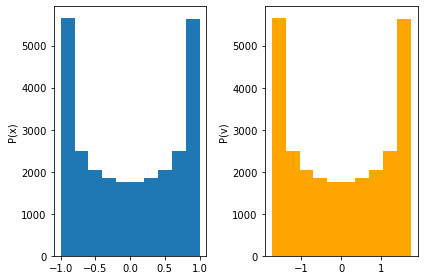

In [181]:
fig, ax =plt.subplots(ncols=2)

ax[0].hist(pos);
ax[1].hist(vel, color='orange');
ax[0].set_ylabel('P(x)')
ax[1].set_ylabel('P(v)')

fig.tight_layout()

### Langevin equation

- A particle of mass $m$ moves under the force derived from a potential energy $U(x)$. The motion is purely deterministic.

$$
m \ddot{x} = -\nabla_x U
$$

- **Challenge:** What should we do when we have only a one or few particles, and cannot explicitly simulate the vast surrounding environment in order to assign temperature?
- **Solution:** We model the surrounding medium (e.g., a solvent) as an **implicit thermal bath** that interacts with the particle.
    - The particle exchanges energy with the bath, maintaining **thermal equilibrium** at a fixed temperature $T$.
    - This motivates **Langevin dynamics**, where the effects of the solvent are captured by **friction** (dissipation) and **random thermal kicks** (fluctuations), without simulating solvent molecules explicitly.

:::{admonition} **Langevin Equation**
:class: important 

$$
m \ddot{x} = -\nabla_x U - \lambda \dot{x} + \eta(t)
$$

:::

:::{admonition} **Overdamped Limit of Langevin Dynamics ($m \ddot{x} = 0$)**
:class: important 

$$
\lambda \dot{x} = \nabla_x U + \eta(t)
$$

:::

- The friction $\lambda$ and thermal noise $\eta(t)$ are clearly connected becasue the faster the particle movies (more noise) the more it also dissipates energy. 
- the connection is known by the name of Fluctuation-Dissipation Theorem:

:::{admonition} **Fluctuation-Dissipation Theorem (FDT)**
:class: important 

$$
\langle \eta(t) \eta(t') \rangle = 2 \lambda k_B T \, \delta(t - t')
$$

:::

- The environment "forgets" what happened almost immediately after a collision very short memory hence noise terms are uncorrelated (independent). Just like what we had in brownian motion. 
- The FDT ensures that the strength of random thermal kicks is precisely tuned to the amount of viscous damping, so that the system reaches and maintains thermal equilibrium at temperature $T$
- FDT guarantees that thermal fluctuations (random noise) and viscous dissipation are balanced, preventing runaway motion and stabilizing equilibrium.
- FDT connects diffusion (random spreading) and viscosity (resistance to motion), both fundamentally controlled by temperature.

:::{admonition}
:class: tip, dropdown


- Let us focus on the **overdamped Langevin equation** for simplicity:
- Assume a **flat potential** first (i.e., $U(x) = 0$) to understand the role of friction and noise alone. (You can later generalize to nonzero $U(x)$, but this captures the key idea.)

$$
\lambda \dot{x}(t) = -\nabla_x U(x) + \eta(t)
$$


$$
\lambda \dot{x}(t) = \eta(t)
\quad \Rightarrow \quad
\dot{x}(t) = \frac{1}{\lambda} \eta(t)
$$

- Thus, integrating over time:

$$
x(t) = x(0) + \frac{1}{\lambda} \int_0^t \eta(s) \, ds
$$

- Let's compute the **mean-square displacement**:

$$
\langle (x(t) - x(0))^2 \rangle
= \frac{1}{\lambda^2} \left\langle \left( \int_0^t \eta(s) \, ds \right)^2 \right\rangle
$$

- Expanding:

$$
= \frac{1}{\lambda^2} \int_0^t \int_0^t \langle \eta(s) \eta(s') \rangle \, ds \, ds'
$$

- Now — **if** we assume $\eta(t)$ is **delta-correlated** (white noise):

$$
\langle \eta(s) \eta(s') \rangle = C \delta(s-s')
$$

- where $C$ is some constant to be determined. Then:

$$
= \frac{C}{\lambda^2} \int_0^t ds
= \frac{C}{\lambda^2} t
$$


$$
\langle (x(t) - x(0))^2 \rangle = \frac{C}{\lambda^2} t
$$

- This shows **diffusive behavior** with an effective **diffusion constant**:

$$
D = \frac{C}{2\lambda^2}
$$

- because for normal diffusion we expect:

$$
\langle (x(t) - x(0))^2 \rangle = 2Dt
$$

**Connect to equilibrium (Einstein relation)**

From statistical mechanics, **the equilibrium distribution** for $x$ must obey the **equipartition theorem**:

If we define the equilibrium probability distribution $P(x)$ for the free particle:

$$
P(x) \propto e^{-\frac{0}{k_B T}} = \text{const}
$$

- (no restoring force). But the *velocity* (or here the "rate of change") still carries thermal energy:

- In equilibrium, for a particle moving slowly through a viscous medium, we know:

- The diffusion coefficient $D$ satisfies the **Einstein relation**:

$$
D = \frac{k_B T}{\lambda}
$$

Thus, matching:

$$
\frac{C}{2\lambda^2} = \frac{k_B T}{\lambda}
$$

Multiplying both sides by $2\lambda^2$, we find:

$$
C = 2 \lambda k_B T
$$


$$
\boxed{ \langle \eta(t) \eta(t') \rangle = 2 \lambda k_B T \, \delta(t-t') }
$$

This is the **fluctuation-dissipation theorem** for Langevin dynamics:  
- **Fluctuations** (noise strength) are linked to **dissipation** (friction $lambda$) and **temperature** $T$).

**Summary Intuition**
- Without friction, noise would make energy grow indefinitely → no equilibrium.
- Without noise, friction would freeze the system.
- FDT guarantees just the right balance to maintain *thermal equilibrium* at temperature $T$.

:::

### Molecualr Dynamics of Harmonic oscillator (NVT)

**Velocity updating when coupled to a thermal heat bath**

$$ v_{t+\Delta t} = v_t e^{-\lambda  \Delta t} + (k_B T)^{1/2} \cdot (1-e^{-2\gamma \Delta t})^{1/2}  \cdot N(0,1)$$

In [197]:
def langevin_md_1d(x, v, dt, kBT, gamma, t_max, en_force):
    '''Langevin dynamics applied to 1D potentials
    Using integration scheme known as BA-O-AB.
    INPUT: Any 1D function with its parameters
    '''
    
    times, pos, vel, KE, PE  = [], [], [], [], []
    
    t = 0  
    for step in range(int(t_max/dt)):
        
        #B-step
        pe, F = en_force(x)
        v    += F*dt/2
        
        #A-step
        x += v*dt/2

        #O-step
        v = v*np.exp(-gamma*dt) + np.sqrt(1-np.exp(-2*gamma*dt)) * np.sqrt(kBT) * np.random.normal()
        
        #A-step
        x +=  v*dt/2
        
        #B-step
        pe, F = en_force(x)
        v    +=  F*dt/2
        
        ### Save output 
        times.append(t), pos.append(x), vel.append(v), KE.append(0.5*v*v), PE.append(pe)    
    
    return np.array(times), np.array(pos), np.array(vel), np.array(KE), np.array(PE)

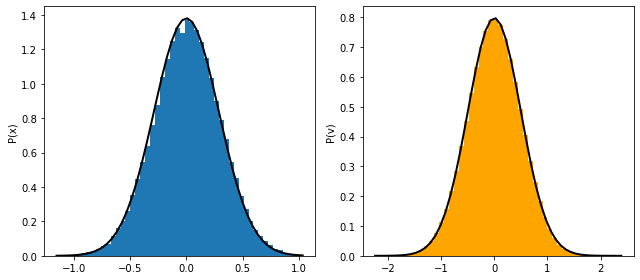

In [205]:
# Ininital conditions
x     = 0.1
v     = 0.5

# Input parameters of simulation
kBT   = 0.25
gamma = 10
dt    = 0.01
t_max = 10000
freq  = 10

### Runt he simulation
times, pos, vel, KE, PE = langevin_md_1d(x, v, dt, kBT, gamma, t_max, ho_en_force)


#### Plot the results

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(9,4))

bins=50

def gaussian_x(x, k, kBT): 
    return  np.exp(-k*(x**2)/(2*kBT)) / np.sqrt(2*np.pi*kBT/k)
    
def gaussian_v(v, kBT):   
    return  np.exp(-(v**2)/(2*kBT))  / np.sqrt(2*np.pi*kBT) 

x = np.linspace(min(pos), max(pos), bins)
ax[0].hist(pos, bins=bins, density=True) 
ax[0].plot(x, gaussian_x(x, k, kBT), lw=2, color='k')

v = np.linspace(min(vel), max(vel), bins)
ax[1].hist(vel, bins=bins, density=True, color='orange') 
ax[1].plot(v, gaussian_v(v, kBT), lw=2, color='k')

ax[0].set_ylabel('P(x)')
ax[1].set_ylabel('P(v)')

fig.tight_layout()

### Double well potential

In [206]:
def double_well(x, k=1, a=3):
    
    energy = 0.25*k*((x-a)**2) * ((x+a)**2)
    force = -k*x*(x-a)*(x+a)
    
    return energy, force

def plot_harm_force(k=1, a=3):
    
    x = np.linspace(-6,6,1000)
    
    energy, force = double_well(x, k, a) 
    
    plt.plot(x, energy, '-o',lw=3)
    plt.plot(x, force, '-', lw=3, alpha=0.5)
    
    plt.ylim(-20,40)
    plt.grid(True)
    plt.legend(['$U(x)$', '$F=-\partial_x U(x)$'], fontsize=15)

plot_harm_force()

interactive(children=(FloatSlider(value=1.0, description='k', max=1.0, min=0.1), FloatSlider(value=3.0, descri…

In [207]:
# Potential 
def double_well(x, k=1, a=3):
    
    energy = 0.25*k*((x-a)**2) * ((x+a)**2)
    force = -k*x*(x-a)*(x+a)
    
    return energy, force

# Ininital conditions
x     = 0.1
v     = 0.5

# Input parameters of simulation
kBT   = 5 # vary this
gamma = 0.1 # vary this
dt    = 0.05
t_max = 10000
freq  = 10

#### Run the simulation
times, pos, vel, KE, PE = langevin_md_1d(x, v, dt, kBT, gamma, t_max, double_well)

#### Plotting 
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(13,5))

x = np.linspace(min(pos), max(pos), 50)

ax[0].plot(pos)
ax[1].hist(pos, bins=50, density=True, alpha=0.5);

v = np.linspace(min(vel), max(vel),50)

ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t)')

ax[1].set_xlabel('Computed P(x)')
ax[1].set_ylabel('x')

### Additional resoruces for learning MD

- [Goran Wahnstrom's MD and MC lectures](http://fy.chalmers.se/~tfsgw/CompPhys/)
- [Online course materials: **principles of modern molecular simulation methods**](https://sites.engineering.ucsb.edu/~shell/che210d/assignments.html)
- ["Understanding Molecular Simulation: From Algorithms to Applications" a book by Daan Frankel](https://www.elsevier.com/books/understanding-molecular-simulation/frenkel/978-0-12-267351-1)

### Problems

#### 1D potential

- In molecular simulations, we often want to sample from the **Boltzmann distribution** $P(x) \propto e^{-V(x)/k_BT}$. 
- Langevin dynamics enables us to do this by modeling the effects of both **deterministic forces** (from the potential) and **random thermal fluctuations**.
- Write a Python function using NumPy to simulate a 1D system under Langevin dynamics for the following potential:

$$
V(x) = Ax^2 + Bx^3 + Cx^4
$$

You should:

1. Implement Langevin dynamics to evolve position and velocity over time.
2. Allow inputs for:
   - Coefficients A, B, C
   - Initial position and velocity
   - Time step `dt`, number of steps
   - Temperature `kBT` and friction coefficient `gamma`
3. Store all positions and plot a **normalized histogram** (probability density) after the simulation.
4. Try the following setups:
   - **Double well**: A = -1, B = 0, C = 1
   - **Asymmetric well**: A = -1, B = -1, C = 1
   - Vary initial positions and explain what changes


5. Compare your histograms with $e^{-V(x)/k_BT}$. Do they match?
6.  What happens if `gamma` is very small? What about very large?